In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
%matplotlib inline
mlp.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("../data/df.csv")
df.head()

,Date,P,D,E,CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real TR Price,...,Real Total BondReturns,10 year anualized stock real return,10 year annualized Real Return,Real 10 year excess annualizedReturns,Real TR Price float,Real TR Scaled Earnings float,Excess CAPE Yield float,10 year anualized stock real return float,10 year annualized Real Return float,Real 10 year excess annualizedReturns float
0,1871.01,4.44,0.26,0.4,12.46,1871.04,5.32,97.25,5.69,97.25,...,1.00,13.06%,9.25%,3.81%,97.25,8.76,NaN,13.06,9.25,3.81
1,1871.02,4.50,0.26,0.4,12.84,1871.13,5.32,95.64,5.53,96.10,...,0.97,13.09%,9.46%,3.62%,96.10,8.54,NaN,13.09,9.46,3.62
2,1871.03,4.61,0.26,0.4,13.03,1871.21,5.33,96.55,5.45,97.47,...,0.96,13.10%,9.62%,3.48%,97.47,8.46,NaN,13.10,9.62,3.48
3,1871.04,4.74,0.26,0.4,12.56,1871.29,5.33,103.03,5.65,104.49,...,1.00,12.21%,9.10%,3.11%,104.49,8.82,NaN,12.21,9.10,3.11
4,1871.05,4.86,0.26,0.4,12.27,1871.38,5.33,108.10,5.78,110.12,...,1.03,12.26%,8.95%,3.31%,110.12,9.06,NaN,12.26,8.95,3.31


In [20]:
df['E10'] = df['Real Earnings'].rolling(window=120, min_periods=120).mean()
df["P/E10"] = df['Real Price'] / df['E10']

Text(0, 0.5, 'Stock Price, P')

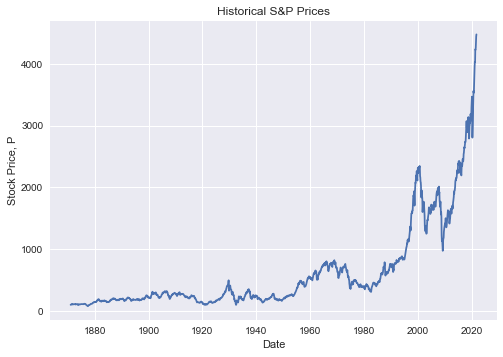

In [24]:
plt.plot(df["Date Fraction"], df["Real Price"])
plt.title("Historical S&P Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price, P")

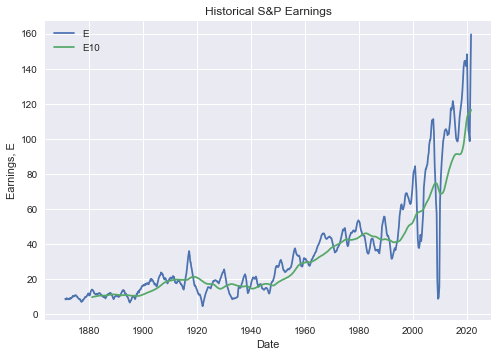

In [27]:
plt.plot(df["Date Fraction"], df["Real Earnings"], label="E")
plt.plot(df["Date Fraction"], df["E10"], label="E10")
plt.title("Historical S&P Earnings")
plt.xlabel("Date")
plt.ylabel("Earnings, E")
plt.legend()

Text(0, 0.5, 'Dividends, D')

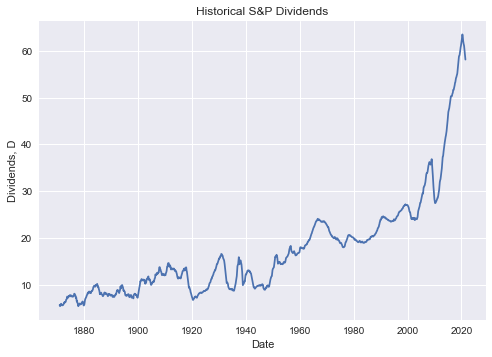

In [29]:
plt.plot(df["Date Fraction"], df["Real Dividend"])
plt.title("Historical S&P Dividends")
plt.xlabel("Date")
plt.ylabel("Dividends, D")

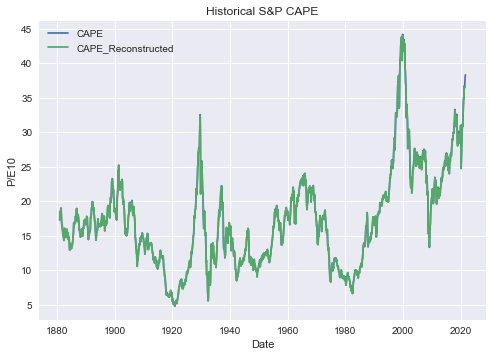

In [30]:
plt.plot(df["Date Fraction"], df["CAPE"], label="CAPE")
plt.plot(df["Date Fraction"], df["P/E10"], label="CAPE_Reconstructed")
plt.title("Historical S&P CAPE")
plt.xlabel("Date")
plt.ylabel("P/E10")
plt.legend()

Text(0.5, 1.0, 'Ten Year MA(E) Growth vs CAPE')

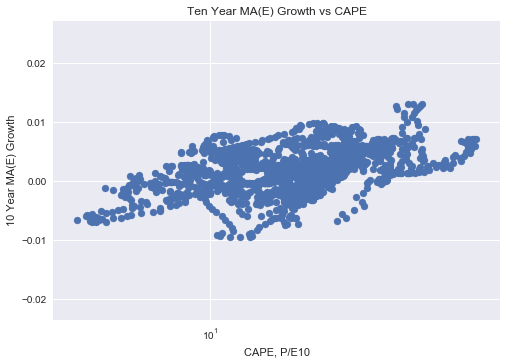

In [31]:
df["10 yr. MAE growth"] = np.log(df.E10.shift(-12)/df.E10.shift())/10
plt.xscale('log')
plt.scatter(df["CAPE"], df["10 yr. MAE growth"])
plt.ylabel("10 Year MA(E) Growth")
plt.xlabel("CAPE, P/E10")
plt.title("Ten Year MA(E) Growth vs CAPE")

Text(0.5, 1.0, 'Ten Year Price Growth vs CAPE')

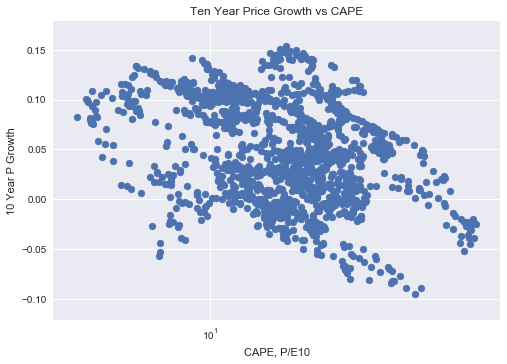

In [32]:
df["10 yr. P growth"] = np.log(df.P.shift(-120)/df.P)/10
plt.xscale('log')
plt.scatter(df["CAPE"], df["10 yr. P growth"])
plt.ylabel("10 Year P Growth")
plt.xlabel("CAPE, P/E10")
plt.title("Ten Year Price Growth vs CAPE")